## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 3072)

In [12]:
from keras.layers import Dense

model = keras.models.Sequential([Dense(units = 512, activation = 'relu', name = 'hidden1', input_shape = (3072,)),
                                 Dense(units = 216, activation = 'relu', name = 'hidden2'),
                                 Dense(units = 128, activation = 'relu', name = 'hidden3'),
                                 Dense(units = 10,  activation = 'softmax', name = 'output')])
    

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,713,250
Trainable params: 1,713,250
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy','mse'])


In [18]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500,
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 211s 4ms/step - loss: 2.0536 - accuracy: 0.2554 - mse: 0.0843 - val_loss: 2.0358 - val_accuracy: 0.2406 - val_mse: 0.0840
Epoch 2/500
50000/50000 [==============================] - 59s 1ms/step - loss: 1.9894 - accuracy: 0.2799 - mse: 0.0827 - val_loss: 2.0575 - val_accuracy: 0.2588 - val_mse: 0.0841
Epoch 3/500
50000/50000 [==============================] - 62s 1ms/step - loss: 1.9475 - accuracy: 0.3015 - mse: 0.0815 - val_loss: 1.9419 - val_accuracy: 0.3110 - val_mse: 0.0812
Epoch 4/500
50000/50000 [==============================] - 63s 1ms/step - loss: 1.9121 - accuracy: 0.3172 - mse: 0.0804 - val_loss: 2.2200 - val_accuracy: 0.1856 - val_mse: 0.0943
Epoch 5/500
50000/50000 [==============================] - 52s 1ms/step - loss: 1.8921 - accuracy: 0.3251 - mse: 0.0798 - val_loss: 1.9580 - val_accuracy: 0.2985 - val_mse: 0.0814
Epoch 6/500
50000/50000 [========================

Epoch 46/500
50000/50000 [==============================] - 52s 1ms/step - loss: 1.4830 - accuracy: 0.4756 - mse: 0.0662 - val_loss: 1.5019 - val_accuracy: 0.4682 - val_mse: 0.0670
Epoch 47/500
50000/50000 [==============================] - 52s 1ms/step - loss: 1.4767 - accuracy: 0.4771 - mse: 0.0660 - val_loss: 1.5023 - val_accuracy: 0.4703 - val_mse: 0.0669
Epoch 48/500
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4717 - accuracy: 0.4809 - mse: 0.0658 - val_loss: 1.4931 - val_accuracy: 0.4673 - val_mse: 0.0668
Epoch 49/500
50000/50000 [==============================] - 48s 961us/step - loss: 1.4649 - accuracy: 0.4816 - mse: 0.0655 - val_loss: 1.5051 - val_accuracy: 0.4630 - val_mse: 0.0671
Epoch 50/500
50000/50000 [==============================] - 49s 976us/step - loss: 1.4603 - accuracy: 0.4834 - mse: 0.0654 - val_loss: 1.5180 - val_accuracy: 0.4574 - val_mse: 0.0678
Epoch 51/500
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4534 - a

50000/50000 [==============================] - 45s 897us/step - loss: 1.2993 - accuracy: 0.5410 - mse: 0.0593 - val_loss: 1.4716 - val_accuracy: 0.4734 - val_mse: 0.0661
Epoch 92/500
50000/50000 [==============================] - 53s 1ms/step - loss: 1.2927 - accuracy: 0.5425 - mse: 0.0591 - val_loss: 1.3999 - val_accuracy: 0.5033 - val_mse: 0.0634
Epoch 93/500
50000/50000 [==============================] - 46s 923us/step - loss: 1.2908 - accuracy: 0.5460 - mse: 0.0590 - val_loss: 1.4601 - val_accuracy: 0.4791 - val_mse: 0.0656
Epoch 94/500
50000/50000 [==============================] - 45s 894us/step - loss: 1.2848 - accuracy: 0.5458 - mse: 0.0588 - val_loss: 1.4792 - val_accuracy: 0.4781 - val_mse: 0.0655
Epoch 95/500
50000/50000 [==============================] - 45s 899us/step - loss: 1.2861 - accuracy: 0.5457 - mse: 0.0589 - val_loss: 1.4119 - val_accuracy: 0.4934 - val_mse: 0.0637
Epoch 96/500
50000/50000 [==============================] - 45s 906us/step - loss: 1.2802 - accuracy

Epoch 136/500
50000/50000 [==============================] - 47s 935us/step - loss: 1.1598 - accuracy: 0.5931 - mse: 0.0538 - val_loss: 1.4422 - val_accuracy: 0.4919 - val_mse: 0.0649
Epoch 137/500
50000/50000 [==============================] - 48s 956us/step - loss: 1.1587 - accuracy: 0.5925 - mse: 0.0538 - val_loss: 1.4084 - val_accuracy: 0.5070 - val_mse: 0.0636
Epoch 138/500
50000/50000 [==============================] - 45s 902us/step - loss: 1.1561 - accuracy: 0.5924 - mse: 0.0537 - val_loss: 1.3586 - val_accuracy: 0.5122 - val_mse: 0.0620
Epoch 139/500
50000/50000 [==============================] - 45s 905us/step - loss: 1.1513 - accuracy: 0.5939 - mse: 0.0535 - val_loss: 1.3956 - val_accuracy: 0.5082 - val_mse: 0.0631
Epoch 140/500
50000/50000 [==============================] - 45s 898us/step - loss: 1.1500 - accuracy: 0.5957 - mse: 0.0535 - val_loss: 1.3938 - val_accuracy: 0.5088 - val_mse: 0.0630
Epoch 141/500
50000/50000 [==============================] - 45s 898us/step - lo

50000/50000 [==============================] - 45s 896us/step - loss: 1.0422 - accuracy: 0.6333 - mse: 0.0491 - val_loss: 1.3966 - val_accuracy: 0.5105 - val_mse: 0.0635
Epoch 181/500
50000/50000 [==============================] - 46s 916us/step - loss: 1.0428 - accuracy: 0.6324 - mse: 0.0491 - val_loss: 1.3974 - val_accuracy: 0.5133 - val_mse: 0.0631
Epoch 182/500
50000/50000 [==============================] - 45s 896us/step - loss: 1.0391 - accuracy: 0.6354 - mse: 0.0489 - val_loss: 1.4697 - val_accuracy: 0.4863 - val_mse: 0.0665
Epoch 183/500
50000/50000 [==============================] - 45s 897us/step - loss: 1.0403 - accuracy: 0.6347 - mse: 0.0489 - val_loss: 1.3355 - val_accuracy: 0.5331 - val_mse: 0.0607
Epoch 184/500
50000/50000 [==============================] - 45s 896us/step - loss: 1.0375 - accuracy: 0.6341 - mse: 0.0488 - val_loss: 1.5732 - val_accuracy: 0.4726 - val_mse: 0.0695
Epoch 185/500
50000/50000 [==============================] - 45s 896us/step - loss: 1.0356 - a

Epoch 225/500
50000/50000 [==============================] - 45s 908us/step - loss: 0.9356 - accuracy: 0.6728 - mse: 0.0445 - val_loss: 1.4851 - val_accuracy: 0.5012 - val_mse: 0.0657
Epoch 226/500
50000/50000 [==============================] - 45s 891us/step - loss: 0.9354 - accuracy: 0.6675 - mse: 0.0446 - val_loss: 1.4882 - val_accuracy: 0.4885 - val_mse: 0.0667
Epoch 227/500
50000/50000 [==============================] - 45s 890us/step - loss: 0.9286 - accuracy: 0.6745 - mse: 0.0442 - val_loss: 1.3773 - val_accuracy: 0.5318 - val_mse: 0.0617
Epoch 228/500
50000/50000 [==============================] - 45s 890us/step - loss: 0.9326 - accuracy: 0.6702 - mse: 0.0444 - val_loss: 1.6506 - val_accuracy: 0.4717 - val_mse: 0.0707
Epoch 229/500
50000/50000 [==============================] - 45s 890us/step - loss: 0.9310 - accuracy: 0.6735 - mse: 0.0444 - val_loss: 1.3754 - val_accuracy: 0.5266 - val_mse: 0.0619
Epoch 230/500
50000/50000 [==============================] - 45s 893us/step - lo

50000/50000 [==============================] - 46s 924us/step - loss: 0.8389 - accuracy: 0.7061 - mse: 0.0403 - val_loss: 1.5125 - val_accuracy: 0.5088 - val_mse: 0.0663
Epoch 270/500
50000/50000 [==============================] - 45s 907us/step - loss: 0.8265 - accuracy: 0.7098 - mse: 0.0397 - val_loss: 1.4279 - val_accuracy: 0.5254 - val_mse: 0.0630
Epoch 271/500
50000/50000 [==============================] - 46s 910us/step - loss: 0.8231 - accuracy: 0.7109 - mse: 0.0397 - val_loss: 1.5206 - val_accuracy: 0.5071 - val_mse: 0.0665
Epoch 272/500
50000/50000 [==============================] - 45s 906us/step - loss: 0.8268 - accuracy: 0.7093 - mse: 0.0399 - val_loss: 1.6498 - val_accuracy: 0.4830 - val_mse: 0.0697
Epoch 273/500
50000/50000 [==============================] - 45s 906us/step - loss: 0.8298 - accuracy: 0.7088 - mse: 0.0399 - val_loss: 1.5099 - val_accuracy: 0.5118 - val_mse: 0.0655
Epoch 274/500
50000/50000 [==============================] - 45s 909us/step - loss: 0.8226 - a

Epoch 314/500
50000/50000 [==============================] - 48s 964us/step - loss: 0.7223 - accuracy: 0.7467 - mse: 0.0351 - val_loss: 1.6335 - val_accuracy: 0.5014 - val_mse: 0.0677
Epoch 315/500
50000/50000 [==============================] - 48s 969us/step - loss: 0.7301 - accuracy: 0.7448 - mse: 0.0355 - val_loss: 1.6851 - val_accuracy: 0.4865 - val_mse: 0.0695
Epoch 316/500
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7200 - accuracy: 0.7501 - mse: 0.0350 - val_loss: 1.6875 - val_accuracy: 0.4917 - val_mse: 0.0701
Epoch 317/500
50000/50000 [==============================] - 48s 966us/step - loss: 0.7213 - accuracy: 0.7483 - mse: 0.0350 - val_loss: 1.6030 - val_accuracy: 0.5110 - val_mse: 0.0674
Epoch 318/500
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7249 - accuracy: 0.7475 - mse: 0.0352 - val_loss: 1.5621 - val_accuracy: 0.5176 - val_mse: 0.0666
Epoch 319/500
50000/50000 [==============================] - 56s 1ms/step - loss: 0.

Epoch 359/500
50000/50000 [==============================] - 58s 1ms/step - loss: 0.6203 - accuracy: 0.7845 - mse: 0.0305 - val_loss: 1.8492 - val_accuracy: 0.4920 - val_mse: 0.0730
Epoch 360/500
50000/50000 [==============================] - 61s 1ms/step - loss: 0.6305 - accuracy: 0.7816 - mse: 0.0309 - val_loss: 1.6456 - val_accuracy: 0.5202 - val_mse: 0.0671
Epoch 361/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.6228 - accuracy: 0.7834 - mse: 0.0306 - val_loss: 1.8651 - val_accuracy: 0.4882 - val_mse: 0.0733
Epoch 362/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.6139 - accuracy: 0.7863 - mse: 0.0302 - val_loss: 1.6858 - val_accuracy: 0.5067 - val_mse: 0.0684
Epoch 363/500
50000/50000 [==============================] - 59s 1ms/step - loss: 0.6253 - accuracy: 0.7824 - mse: 0.0307 - val_loss: 1.8326 - val_accuracy: 0.4915 - val_mse: 0.0727
Epoch 364/500
50000/50000 [==============================] - 54s 1ms/step - loss: 0.6224 -

Epoch 404/500
50000/50000 [==============================] - 52s 1ms/step - loss: 0.5173 - accuracy: 0.8223 - mse: 0.0255 - val_loss: 1.9580 - val_accuracy: 0.4855 - val_mse: 0.0740
Epoch 405/500
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5389 - accuracy: 0.8141 - mse: 0.0266 - val_loss: 1.8134 - val_accuracy: 0.5070 - val_mse: 0.0708
Epoch 406/500
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5300 - accuracy: 0.8203 - mse: 0.0260 - val_loss: 1.7973 - val_accuracy: 0.5170 - val_mse: 0.0696
Epoch 407/500
50000/50000 [==============================] - 53s 1ms/step - loss: 0.5201 - accuracy: 0.8221 - mse: 0.0256 - val_loss: 1.8802 - val_accuracy: 0.4988 - val_mse: 0.0720
Epoch 408/500
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5367 - accuracy: 0.8167 - mse: 0.0265 - val_loss: 1.8031 - val_accuracy: 0.5174 - val_mse: 0.0695
Epoch 409/500
50000/50000 [==============================] - 57s 1ms/step - loss: 0.5389 -

Epoch 449/500
50000/50000 [==============================] - 49s 973us/step - loss: 0.4334 - accuracy: 0.8528 - mse: 0.0215 - val_loss: 1.9712 - val_accuracy: 0.5215 - val_mse: 0.0715
Epoch 450/500
50000/50000 [==============================] - 49s 979us/step - loss: 0.4264 - accuracy: 0.8562 - mse: 0.0211 - val_loss: 1.9462 - val_accuracy: 0.5195 - val_mse: 0.0712
Epoch 451/500
50000/50000 [==============================] - 49s 973us/step - loss: 0.4461 - accuracy: 0.8486 - mse: 0.0220 - val_loss: 1.9843 - val_accuracy: 0.5087 - val_mse: 0.0727
Epoch 452/500
50000/50000 [==============================] - 49s 979us/step - loss: 0.4339 - accuracy: 0.8535 - mse: 0.0214 - val_loss: 2.0517 - val_accuracy: 0.4977 - val_mse: 0.0746
Epoch 453/500
50000/50000 [==============================] - 49s 976us/step - loss: 0.4479 - accuracy: 0.8468 - mse: 0.0222 - val_loss: 2.4993 - val_accuracy: 0.4533 - val_mse: 0.0837
Epoch 454/500
50000/50000 [==============================] - 49s 980us/step - lo

50000/50000 [==============================] - 48s 968us/step - loss: 0.3527 - accuracy: 0.8847 - mse: 0.0173 - val_loss: 2.5604 - val_accuracy: 0.4739 - val_mse: 0.0823
Epoch 494/500
50000/50000 [==============================] - 49s 977us/step - loss: 0.3619 - accuracy: 0.8816 - mse: 0.0178 - val_loss: 2.2881 - val_accuracy: 0.4965 - val_mse: 0.0769
Epoch 495/500
50000/50000 [==============================] - 49s 974us/step - loss: 0.3600 - accuracy: 0.8798 - mse: 0.0179 - val_loss: 2.3401 - val_accuracy: 0.4913 - val_mse: 0.0770
Epoch 496/500
50000/50000 [==============================] - 49s 977us/step - loss: 0.3611 - accuracy: 0.8813 - mse: 0.0179 - val_loss: 2.2633 - val_accuracy: 0.5041 - val_mse: 0.0764
Epoch 497/500
50000/50000 [==============================] - 50s 1ms/step - loss: 0.3477 - accuracy: 0.8876 - mse: 0.0171 - val_loss: 2.1568 - val_accuracy: 0.5165 - val_mse: 0.0739
Epoch 498/500
50000/50000 [==============================] - 61s 1ms/step - loss: 0.3894 - accur

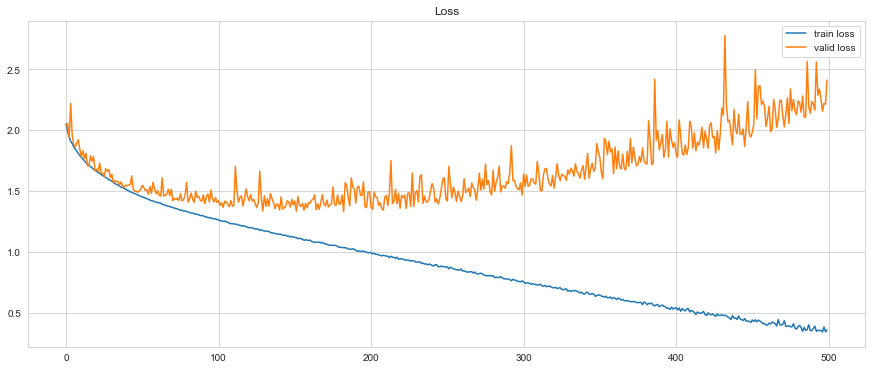

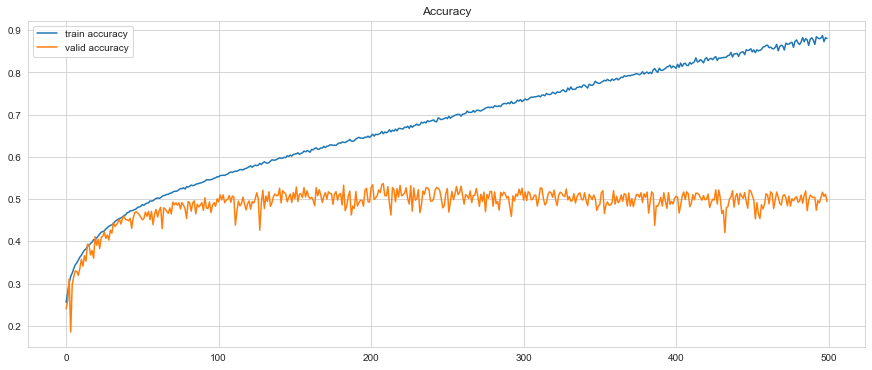

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# 以視覺畫方式檢視訓練過程


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.figure(figsize = (15,6))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize = (15,6))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [25]:
import numpy as np
val_accuracy = np.array(model.history.history["val_accuracy"])
val_loss = np.array(model.history.history["val_loss"])

In [24]:
np.argmax(val_accuracy)

208

In [26]:
np.argmin(val_loss)

182